In [2]:
import pandas as pd
import numpy as np
import itertools as it
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import random

from collections import Counter
import operator

In [3]:
prot_mass_df = pd.read_csv('human_proteome_mass_bins2.csv')

In [4]:
##### Arosne2: check to see if I have imported the correct file. 
prot_mass_df.head()

,Unnamed: 0,Entry,Entry Name,Protein names,Gene Names,Mass,0-15,15-29,29-33,33-37,37-39,39-41,41-53,53-80
0,0,A0A024QZ08,A0A024QZ08_HUMAN,Intraflagellar transport 20 homolog (Chlamydom...,IFT20 hCG_31823,15281,0,0,0,0,0,0,0,0
1,1,A0A024QZ86,A0A024QZ86_HUMAN,"T-box 2, isoform CRA_a",TBX2 hCG_32216,75066,0,0,0,0,0,0,0,0
2,2,A0A024QZA8,A0A024QZA8_HUMAN,Receptor protein-tyrosine kinase (EC 2.7.10.1),EPHA2 hCG_24712,108266,0,0,0,0,0,0,0,0
3,3,A0A024QZB8,A0A024QZB8_HUMAN,Battenin,CLN3 hCG_1745226,47623,0,0,0,0,0,0,0,0
4,4,A0A024QZQ1,A0A024QZQ1_HUMAN,Sirtuin (Silent mating type information regula...,SIRT1 hCG_32306,81681,0,0,0,0,0,0,0,0


In [6]:
#arosne2: make dataframe with all proteins of interest and their stoichiometry.
prot_of_interest_stoic_df = pd.DataFrame([["Q567U6",1],['O60826',1],["Q7Z3J2",1],['Q7Z4G1',1],["Q86VX2",1],['Q86X83',1],["Q9GZQ3",1],['Q9H0A8',1],["Q9NX08",1],['Q9P000',1],["Q9UBI1",1],['Q9Y6G5',1]],columns=['prot_id','Stoichiometry'])


In [7]:
#arosne2: output dataframe into csv
prot_of_interest_stoic_df.to_csv('prot_of_interest_stoic.csv')

In [8]:
#arosne2: if dataframe already exists, take in dataframe with all proteins of interest and thier stoichiometry.
prot_of_interest_stoic_df = pd.read_csv('prot_of_interest_stoic.csv')

In [9]:

prot_of_interest_stoic_df.head()

,Unnamed: 0,prot_id,Stoichiometry
0,0,Q567U6,1
1,1,O60826,1
2,2,Q7Z3J2,1
3,3,Q7Z4G1,1
4,4,Q86VX2,1


In [10]:
#arosne2: pull the prot_id and the Stoichiometry from the input dataframe into a dictionary
dict_prot_stoic= dict(zip(prot_of_interest_stoic_df.prot_id,prot_of_interest_stoic_df.Stoichiometry))

In [11]:
#arosne2: Check the dictionary
print(dict_prot_stoic)

{'Q567U6': 1, 'O60826': 1, 'Q7Z3J2': 1, 'Q7Z4G1': 1, 'Q86VX2': 1, 'Q86X83': 1, 'Q9GZQ3': 1, 'Q9H0A8': 1, 'Q9NX08': 1, 'Q9P000': 1, 'Q9UBI1': 1, 'Q9Y6G5': 1}


In [12]:
#arosne2: 1. create a new df, then append that df with every consecutive prot/stoic

In [24]:
#arosne2: 1. create a new df, then append that df with every consecutive prot/stoic
Output_df = pd.DataFrame()
for k in dict_prot_stoic:
    Temp_df=Tprof_df_fullfractions(k, dict_prot_stoic[k])
    print(Temp_df)
    if Output_df.empty:
        Output_df= Temp_df
    else:
        Output_df= pd.concat([Output_df, Temp_df])
Output_df= Output_df.set_index('prot_id')
print(Output_df)

  prot_id  Stoichiometry  15  16  17  18  19  20  21  22  ...  51  52  53  54  \
0  Q567U6              1   0   0   0   0   0   0   0   0  ...   0   0   0   0   

   55  56  57  58  59  60  
0   0   0   0   0   0   0  

[1 rows x 48 columns]
  prot_id  Stoichiometry  15  16  17  18  19  20  21  22  ...  51  52  53  54  \
0  O60826              1   0   0   0   0   0   0   0   0  ...   0   0   0   0   

   55  56  57  58  59  60  
0   0   0   0   0   0   0  

[1 rows x 48 columns]
  prot_id  Stoichiometry  15  16  17  18  19  20  21  22  ...  51  52  53  54  \
0  Q7Z3J2              1   0   0   0   0   0   0   0   0  ...   0   0   0   0   

   55  56  57  58  59  60  
0   0   0   0   0   0   0  

[1 rows x 48 columns]
  prot_id  Stoichiometry  15  16  17  18  19  20  21  22  ...  51  52  53  54  \
0  Q7Z4G1              1   0   0   0   0   0   0   0   0  ...   0   0   1   1   

   55  56  57  58  59  60  
0   1   1   1   1   1   1  

[1 rows x 48 columns]
  prot_id  Stoichiometry  15  16

In [23]:
#arosne2: prot_id is the Uniprot Entry, This creates a new list.
#arosne2: This creates a dataframe with a # of fractions to output.
def Tprof_df_fullfractions(prot_id, Stoichiometry):
#arosne2: take mass from Uni_prot csv using prot_id, multiply mass by stoichiometry.
    m = prot_mass_df.loc[prot_mass_df[prot_mass_df['Entry'] == prot_id].index[0],"Mass"]
    ms= Stoichiometry * m
 #arosne2: number of fraction bins
    binsnum = 10
    r=[0]*binsnum
    r[0]= prot_id
    r[1]= Stoichiometry
   
 #arosne2: check the Mass*Stoichiometry against each of the bins of fractions. binary: 1 if in that bin, 0 if not.   
    if ms > 1005000:
        r[2]=1
    elif 1005000 > ms > 670000:
        r[3]=1
    elif 670000 > ms > 435000:
        r[4]=1
    elif 435000 > ms > 150000:
        r[5]=1
    elif 150000 > ms > 102000:
        r[6]=1
    elif 102000 > ms > 40000:
        r[7]=1
    elif 40000 > ms > 10000:
        r[8]=1
    elif 10000 > ms > 0:
        r[9]=1
         
            #arosne2: export list to df in columns with bins
    r_df = pd.DataFrame({'prot_id':[r[0]],
                        'Stoichiometry':[r[1]],
                         '15':[r[2]],
                         '16':[r[3]],
                         '17':[r[3]],
                         '18':[r[3]],
                         '19':[r[3]],
                         '20':[r[3]],
                         '21':[r[3]], 
                         '22':[r[3]],
                         '23':[r[3]],
                         '24':[r[3]],
                         '25':[r[3]],
                         '26':[r[3]],
                         '27':[r[3]],
                         '28':[r[3]],
                         '29':[r[3]],
                         '30':[r[4]],
                         '31':[r[4]],
                         '32':[r[4]],
                         '33':[r[4]], 
                         '34':[r[5]],
                         '35':[r[5]],
                         '36':[r[5]],
                         '37':[r[5]],
                         '38':[r[6]],
                         '39':[r[6]],
                         '40':[r[7]],
                         '41':[r[8]],
                         '42':[r[8]],
                         '43':[r[8]],
                         '44':[r[8]], 
                         '45':[r[8]],
                         '46':[r[8]],
                         '47':[r[8]],
                         '48':[r[8]],
                         '49':[r[8]],
                         '50':[r[8]],
                         '51':[r[8]],
                         '52':[r[8]],
                         '53':[r[9]],
                         '54':[r[9]],
                         '55':[r[9]],
                         '56':[r[9]], 
                         '57':[r[9]],
                         '58':[r[9]],
                         '59':[r[9]],
                         '60':[r[9]]})

    return r_df

In [17]:
prot_of_interest_stoic_df.prot_id.values.tolist()

['Q567U6',
 'O60826',
 'Q7Z3J2',
 'Q7Z4G1',
 'Q86VX2',
 'Q86X83',
 'Q9GZQ3',
 'Q9H0A8',
 'Q9NX08',
 'Q9P000',
 'Q9UBI1',
 'Q9Y6G5']

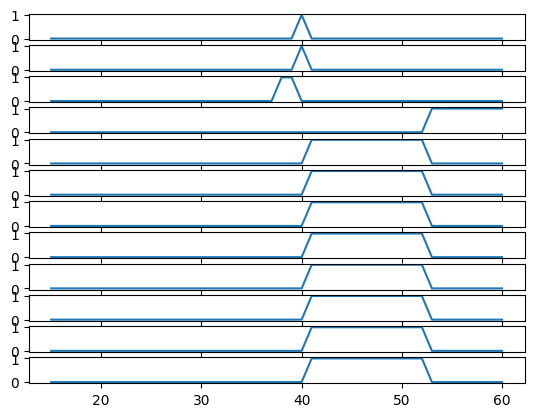

In [25]:
#arosne2: Plotting sparklines
#arosne2: Transform to compare to experimental Sparklines
IDs = prot_of_interest_stoic_df.prot_id.values.tolist()
fig, axs = plt.subplots(len(IDs))
for i,ID in enumerate(IDs):
    axs[i].plot(range(15,61), Output_df.loc[ID].values[1:], label='Predicted_Binned_Elution')

In [30]:
MassofComplexOutput_df = pd.DataFrame()
for k in dict_prot_stoic:
    Temp_df= massofcomplex(dict_prot_stoic)
    
    if Output_df.empty:
        Output_df= Temp_df
    else:
        MassofComplexOutput_df= pd.concat([MassofComplexOutput_df, Temp_df])
print(MassofComplexOutput_df)

Q567U6
73198
73198.0
O60826
70756
143954.0
Q7Z3J2
109563
253517.0
Q7Z4G1
9638
263155.0
Q86VX2
22540
285695.0
Q86X83
22745
308440.0
Q9GZQ3
24670
333110.0
Q9H0A8
21764
354874.0
Q9NX08
21090
375964.0
Q9P000
21819
397783.0
Q9UBI1
22151
419934.0
Q9Y6G5
22966
442900.0
Q567U6
73198
73198.0
O60826
70756
143954.0
Q7Z3J2
109563
253517.0
Q7Z4G1
9638
263155.0
Q86VX2
22540
285695.0
Q86X83
22745
308440.0
Q9GZQ3
24670
333110.0
Q9H0A8
21764
354874.0
Q9NX08
21090
375964.0
Q9P000
21819
397783.0
Q9UBI1
22151
419934.0
Q9Y6G5
22966
442900.0
Q567U6
73198
73198.0
O60826
70756
143954.0
Q7Z3J2
109563
253517.0
Q7Z4G1
9638
263155.0
Q86VX2
22540
285695.0
Q86X83
22745
308440.0
Q9GZQ3
24670
333110.0
Q9H0A8
21764
354874.0
Q9NX08
21090
375964.0
Q9P000
21819
397783.0
Q9UBI1
22151
419934.0
Q9Y6G5
22966
442900.0
Q567U6
73198
73198.0
O60826
70756
143954.0
Q7Z3J2
109563
253517.0
Q7Z4G1
9638
263155.0
Q86VX2
22540
285695.0
Q86X83
22745
308440.0
Q9GZQ3
24670
333110.0
Q9H0A8
21764
354874.0
Q9NX08
21090
375964.0
Q9P000
21819
3

In [27]:
#arosne2:This bins the sum of mass*stoic of every protein in the complex
#arosne2: prot_id is the Uniprot Entry, This creates a new list.
#arosne2: This creates a dataframe wih 0 through 80 fractions to output.
def massofcomplex(dict_prot_stoic):
#arosne2: take mass from Uni_prot csv using prot_id, multiply mass by stoichiometry.
    complexmass = 0.0
    for prot in dict_prot_stoic:
        m = prot_mass_df.loc[prot_mass_df[prot_mass_df['Entry'] == prot].index[0],"Mass"]
        ms= dict_prot_stoic[prot] * m
        complexmass = complexmass + ms  
        print(prot)
        print(m)
        print(complexmass)
        
 #arosne2: number of fraction bins
    binsnum = 10
    r=[0]*binsnum
    r[0]= 0
    r[1]= 0
   
 #arosne2: check the Mass*Stoichiometry against each of the bins of fractions. binary: 1 if in that bin, 0 if not.   
    if complexmass > 1005000:
        r[2]=1
    elif 1005000 > complexmass > 670000:
        r[3]=1
    elif 670000 > complexmass > 435000:
        r[4]=1
    elif 435000 > complexmass > 150000:
        r[5]=1
    elif 150000 > complexmass > 102000:
        r[6]=1
    elif 102000 > complexmass > 40000:
        r[7]=1
    elif 40000 > complexmass > 10000:
        r[8]=1
    elif 10000 > complexmass > 0:
        r[9]=1
         
            #arosne2: export list to df in columns with bins
    r_df = pd.DataFrame({'prot_id':[r[0]],
                        'Stoichiometry':[r[1]],
                         '15':[r[2]],
                         '16':[r[3]],
                         '17':[r[3]],
                         '18':[r[3]],
                         '19':[r[3]],
                         '20':[r[3]],
                         '21':[r[3]], 
                         '22':[r[3]],
                         '23':[r[3]],
                         '24':[r[3]],
                         '25':[r[3]],
                         '26':[r[3]],
                         '27':[r[3]],
                         '28':[r[3]],
                         '29':[r[3]],
                         '30':[r[4]],
                         '31':[r[4]],
                         '32':[r[4]],
                         '33':[r[4]], 
                         '34':[r[5]],
                         '35':[r[5]],
                         '36':[r[5]],
                         '37':[r[5]],
                         '38':[r[6]],
                         '39':[r[6]],
                         '40':[r[7]],
                         '41':[r[8]],
                         '42':[r[8]],
                         '43':[r[8]],
                         '44':[r[8]], 
                         '45':[r[8]],
                         '46':[r[8]],
                         '47':[r[8]],
                         '48':[r[8]],
                         '49':[r[8]],
                         '50':[r[8]],
                         '51':[r[8]],
                         '52':[r[8]],
                         '53':[r[9]],
                         '54':[r[9]],
                         '55':[r[9]],
                         '56':[r[9]], 
                         '57':[r[9]],
                         '58':[r[9]],
                         '59':[r[9]],
                         '60':[r[9]]})

    return r_df

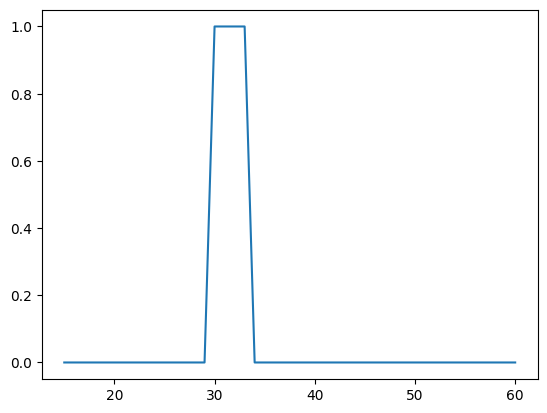

In [29]:
#arosne2: Plotting sparklines
#arosne2: Transform to compare to experimental Sparklines
IDs = ["Commander Complex"]
fig, axs = plt.subplots(len(IDs))
for i,ID in enumerate(IDs):
    axs.plot(range(15,61), MassofComplexOutput_df.iloc[0].values[2:], label='Predicted_Binned_Elution')